In [1]:
import pandas as pd

feature_df = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)
feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [2]:
label_df = pd.read_csv('gisette_train.labels', header=None)
label_df = label_df.iloc[:,0]
label_df

0       1
1      -1
2       1
3       1
4       1
       ..
5995   -1
5996    1
5997   -1
5998   -1
5999   -1
Name: 0, Length: 6000, dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x = feature_df.values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [4]:
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components=2)
principalComponents_gisette = pca_gisette.fit_transform(x)
principal_gisette_df = pd.DataFrame(data=principalComponents_gisette, columns=['PC1', 'PC2'])

In [5]:
pca_gisette.explained_variance_ratio_

array([0.02883488, 0.02258951])

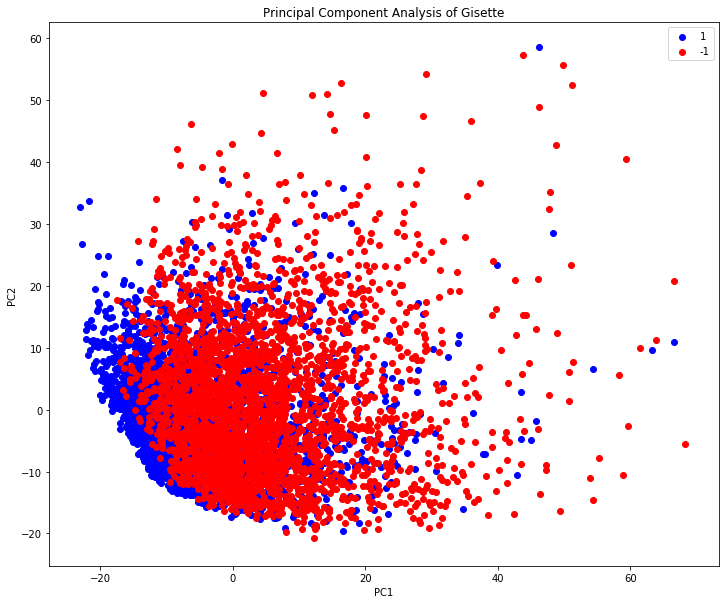

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis of Gisette")
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_gisette_df.loc[indicesToKeep, 'PC1'], principal_gisette_df.loc[indicesToKeep, 'PC2'], c=color)
plt.legend(targets)

In [7]:
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr[:10])))

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069


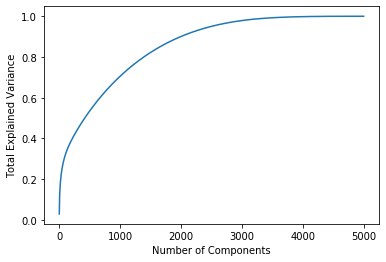

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');